## **SC1003 Project** ##
### Overview of the report ###
This report contains the following content:
1. Quick Introduction of the Task
2. Description of the Algorithm
3. Overview of the code for the basic version of the task
4. Detailed explanation of each function of the basic version of the code + the code for each function
5. The full code for the basic requirement
6. Challenges faced and evaluation of the code
7. The code for the advanced requirement of the code, together with the description of the changes made to the code for the advanced requirement.
<br>

## **Introduction to the Task:** ##
Make a code that splits students in the file records.csv into teams of 4/5. Teams must following the below conditions:
<br>
#### Basic Requirements ####
1) Teams must consist of students from the same tutorial group
<br>
2) Teams must be as diverse as possible in terms of School, Gender and CGPA.

#### Advanced Requirements####
1) The code should be such that the user is able to customise the desired number of students in each team (anywhere from 4 to 10).


## **Problem decomposition** (Change to brief description of the algorithm) ##

1)Collect information from the document "records.csv" and store them in the global dictionary called cohort for future reference.

2)Sort students according to CGPA in tutorial group

3)Create desired number of teams in each tutorial group

4)calculate the average CGPA of the tutorial group

5)Add 2 members from the tutorial group to each team by pairing the student with the highest CGPA with the student with the lowest CGPA.  repeat this process for all the teams. For example, the second team consists of students with second highest CGPA and second lowest CGPA in the tutorial group.

6)create a dictionary called leftover. reorganise the remaining students in leftover. Students are sorted according to cgpa, school and then gender.

7)add the next 2 or 3 members for each of the team. This is done one member by one member for each team to ensure better diversity.

-organise members into different priority levels depending on how well they suit the team.

-If a priority level does not have any members (ie: There is no "Most suitable" student), look for the next best one

8)Everytime a new member is to be added into the team, sort the students in the dictionary leftovers according to their priority level. The leftover students are splitted into 8 different priority levels, which is dependent on CGPA (above/below average), School diversity (same/different school as team members) and Gender (desired/undesired gender for balancing).

-First priority:  right range of cgpa, different school, desired gender

-Last priority:  wrong range of cgpa, same school, undesired gender

9)After adding the new member to team remove the person from leftover dictionary. This process will be done repeatedly until there are no more students in the leftover dictionary and every student has a team.

10)Consolidate the current information of the team by gathering the information of each student. This process identifies the average CGPA, the schools represented, and the number of male and female members in the team. This is to determine how much the remaining students in leftovers makes the teams more diverse.

11)Create a main module. This module ties the other modules together to form teams with the most diversity. It also opens a new file called "teams.csv" and writes the information of the students (as shown in records.csv) and the team allocation (as a separate column).



## **Overview of the code (basic)** ##
The process of allocating students into various teams can be split in multiple steps, which are covered by various functions in the code. The below shows a brief description of the steps and the modules that are responsible for the step. More information regarding each function can be found in the later parts of the report.  <br>
### 1. Collecting and Parsing Student Data
#### Function involved in this step: collect() ####
The process begins with the collect() function, which opens and read the file "records.csv" and stores the information in a global dictionary called cohort. The CSV file consists of various student details, such as ID, name, school, CGPA, and gender. The collect() function reads the data line by line and splits it into individual student records.

Each student’s data is organized into a nested dictionary called cohort, which sorts the students based on their tutorial group, and stores the student's information such as student ID, school, CGPA and gender under their name. More information about the dictionary cohort can be found in the later portions of the report.
<br> <br>
### 2. Sorting Students (by CGPA) ###
#### Function involved in this step: cgpasort() ####
Once the data is collected, the next step is to sort students of the same tutorial group according to their CGPA. This is handled by the function cgpasort() which sorts the students within that group by their CGPA in ascending order.

Sorting students by CGPA helps in the process of team creation, where we want to ensure that each team has a mix of both high-performing and lower-performing students. By sorting the students in advance, we can pair high-CGPA students with low-CGPA students in a way that ensures balanced teams.
<br> <br>
### 3. Creating Teams ###
#### Function involved in this step: createteams()

With the students sorted by CGPA, the next challenge is to divide them into smaller teams. The createteams() function handles this task.

In this function, the script first pairs the 10 best performing and 10 worst performing students (in terms of CGPA) and assigns each pair as the first two members of the teams. This step is crucial for ensuring that each team has a balance of strong and weaker performers. The students with the highest CGPA are paired with those with the lowest CGPA, which ensures that each team has a diverse mix of academic abilities.
<br> <br>
### 4. Assigning Students to Teams Based on Diversity###
#### Function involved in this step: createteams(), findmembers()

After designating the first two members in each team, the script then does the following:
1. Gather the information of the students who are not allocated in a team through the function reorganise() and stores it in a dictionary called "leftovers"
2. Gather information of the team in interest through the function gatherinfo(). This is done to track the current status of a team when the code is looking for a new suitable member to add into the team. <br>

After allocating the first two members of the team, and perfoming the above, the script then attempts to allocate the remaining students into the preexisting teams. In order to know which student to allocate to the team, the script relies on the function findmembers() to sort the students into different priority levels.
<br> <br>
### 5. Priority Based Selection###
#### Function involved in this step: findmembers(), removestudent(), gatherinfo()

The findmembers() function sorts students based on the preset criteria: School, CGPA and Gender into a total of 8 priority levels. Students who better fit the diversity criteria are placed in the highest priority level, while those who suits the team less are placed in a lower priority level. This allows the script to create teams that are diverse both academically and demographically.

After a student is allocated into a team, the script then removes the student from the dictionary "leftovers" through the function removestudent() and moves on to add a member to the next team. This process will be done repeatedly, looping through the teams until there are no more students who is not allocated to a team.

The function in the code, gatherinfo, is designed to analyze a particular team and generate a summary of the group's characteristics. It focuses on several important metrics, including the team's gender balance, academic performance, and the distribution of students from different schools. These factors can provide valuable insights into team dynamics, helping us to make informed decisions about team composition or monitor the diversity of academic performance within a team.
<br><br>
### 6. Reorganising data###
#### Function involved in this step: reorganise()
The given function, reorganise, is designed to categorize students in a tutorial group into two main categories—above average CGPA and below average CGPA—based on their CGPA in relation to a given threshold.

The students are then grouped into their respective schools, with further subcategorization by gender.
The function ensures that students already in existing teams are skipped, preventing duplication. This is achieved by checking the student's membership in any existing team before processing them.
<br><br>
### 7. Find members###
#### Function involved in the code: findmembers ####

The findmembers function is designed to assist in the selection and prioritization of students for a team, based on various criteria such as their academic performance (CGPA), gender, and school affiliation. It takes in a set of inputs that describe the current team structure, the tutorial group’s average CGPA, and the list of students available for selection. The function organizes potential team members into different priority levels, taking into account the team’s existing gender composition and preference for students from specific schools.

The function starts by comparing the team’s average CGPA with the tutorial group’s average. Based on this comparison, the students are categorized into two main groups: those with above-average CGPAs and those with below-average CGPAs. The priority order is established depending on whether the team’s average CGPA is higher or lower than the tutorial group’s. Students who fall into the preferred CGPA group are placed in higher priority levels, while those who do not meet the desired CGPA range are placed in lower priority levels.


The function teaminfo() will be invoked everytime the script moves on to the next team so as to ensure that the student that is allocated into the team is based on accurate information.
<br><br>
### 8. Removing students###
#### Function involved in the code: removestudent ####
The removestudent function is designed to remove a student from a dictionary of leftover students who haven't been added to a team.
The function first checks whether the student’s CGPA is above or below the team's average CGPA (averagecgpa). Based on this comparison, the student's CGPA range is classified as either "aboveavg" or "belowavg".

The function retrieves the student’s school and gender from the cohort dictionary, which contains detailed student data.
Using the del statement, the function removes the student from the leftover dictionary. The dictionary is structured with the keys "aboveavg" and "belowavg" for CGPA categories, followed by the student's school and gender.
<br><br>

### 9. Writing the Results to a New CSV File ###
#### Function involved in this step: main() ####

Once the teams are created and assigned, the results are written to a new CSV file. This is done in the main() function, which iterates over each tutorial group and appends the team assignments to a file called teams.csv. The CSV file contains detailed information about each student, including their team number, CGPA, gender, and school.



#**Further elaboration of each functions in the code** #

#### 1: collect() ####

This module serves to collect information from the document "records.csv" and stores them in the global dictionary called cohort for future reference.
<br> <br>
cohort is a nested dictionary which sorts the students according to their tutorial group as well as stores the details of each students (the information being student ID, School, CGPA and gender). The hierarchy of the nested dictionary is shown in the image below:
<br>
(The highlighted portions in the image, excluding cohort itself, are the dictionaries embedded into cohort. The ones that are not highlighted are the keys of the dictionaries)
<br>
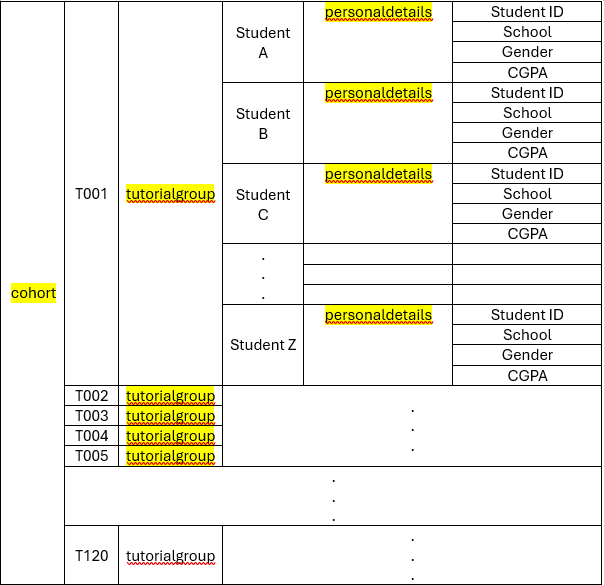
<br>
As shown in the picture above, the cohort dictionary consists of the names of each tutorial group as the key. Each tutorial group then leads to another dictionary called tutorialgroup which contains the names of all the students in the same tutorial group as the key. The names of each student then leads to another dictionary called personaldetails which contains the key information of the students (Student ID, School, CGPA, Gender).
<br> <br>
Flowchart: <br>
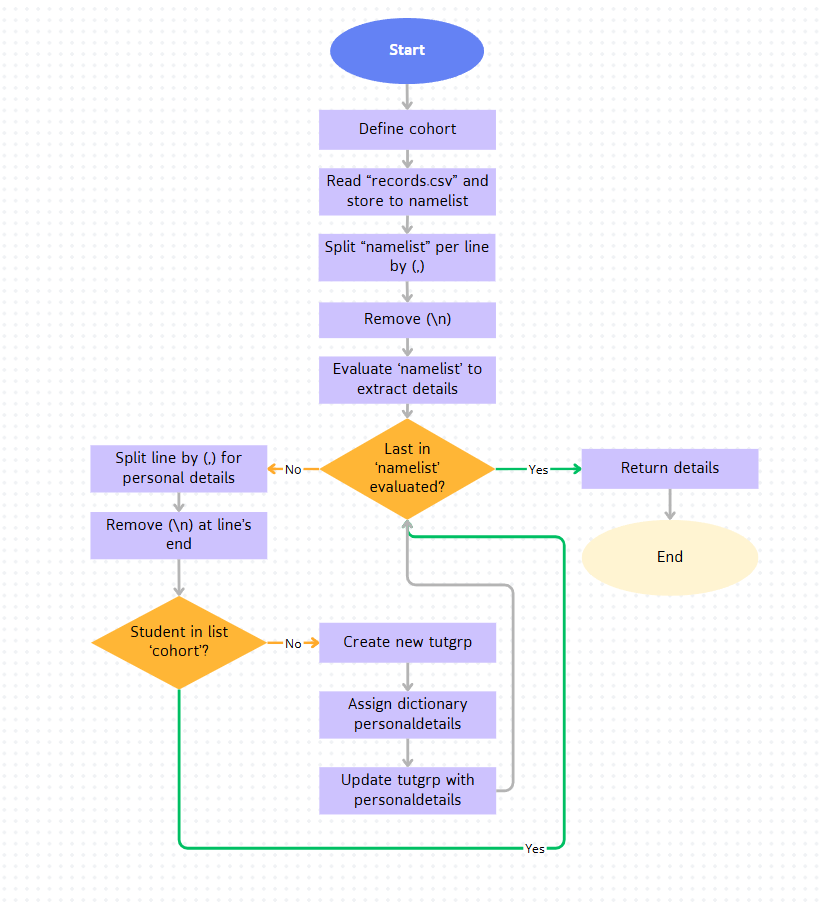

In [ ]:
import random
cohort = {}

# collect students information from the csv file and stores it in the cohort dictionary
def collect():
    global cohort
    with open("records.csv", "r") as namelist:
        # handling the header of the table, as this is information that we need to use as the key of the dictionary personaldetails
        # note that the resultant list will be [Tutorial Group, Student ID, School, Name, Gender, CGPA]
        details = namelist.readline().split(",")
        details[-1] = details[-1].strip("\n") # this removes the newline component in the last element of the line
        # storing the information into the cohort dictionary
        for person in namelist:
            student = person.split(",") # turns the line into a list of information
            student[-1] = float(student[-1].strip("\n")) # removes the newline behind the CGPA value and transforms it into a float for easier comparision for values
            # if the tutorial group is not included in cohort, starts a new tutgrp dictionary and adds the tutorial group as a key in the dictionary.
            # This helps to dynamically input the tutorial group, instead of manually coding all 120 tutorial groups into the dictionary.
            if student[0] not in cohort:
                tutgrp = {}
                cohort.update({student[0]:tutgrp})
            # personaldetails is the dictionary containing the key information of a student (ie: Student ID, School, Gender and CGPA)
            personaldetails = {
                                details[1] : student[1],
                                details[2] : student[2],
                                details[4] : student[4],
                                details[5] : student[5]
                            }
            tutgrp.update({student[3]:personaldetails})
    return details

#### 2. cgpasort(tutorialgroup)
As mentioned in the earlier overview, this function sorts the students in a tutorialgroup according to ascending CGPA. The code does this by making a list called studentcgpa, of which each element is a list which consists of the CGPA and name of each student. For example: <br> <br>
studentcgpa = [ [2.35, "Alice"], [4.32, "Ben"], [3.45, "Charlie"], [4.32, "Dennis" ] ]
<br><br>
The list is then sorted using Python's in house sorting function, which prioritises the CGPA of each student (as it is the first element of each of the list in studentcgpa), and then the alphabetical order of the names (which is of no concern given the context of the task). As such, applying studentcgpa.sort() to the above list would yield something like this: <br><br>

studentcgpa = [ [2.35, "Alice"], [3.45, "Charlie"], [4.32, "Ben"], [4.32, "Dennis"] ] <br> <br>

The function then returns the sorted list for the script to work on.
<br> <br>
Flowchart: <br>
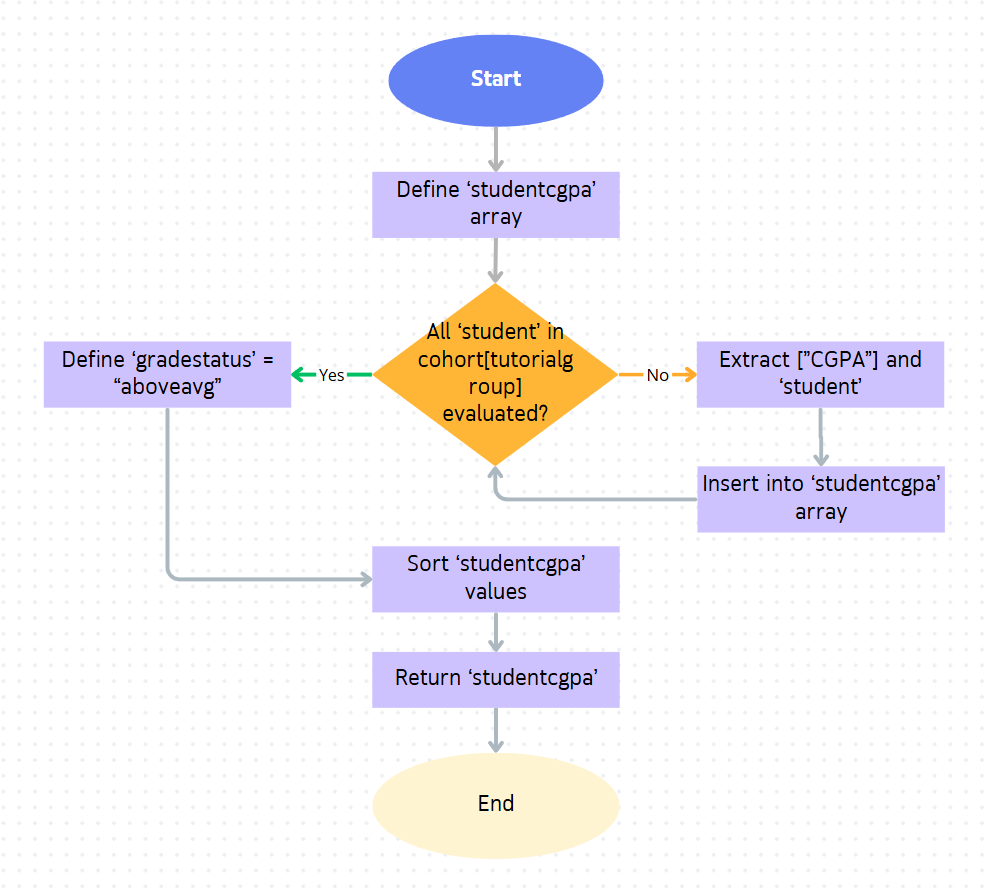

In [ ]:
# sorts students in the tutorial group in accordance to CGPA
def cgpasort(tutorialgroup):
    studentcgpa = [[cohort[tutorialgroup][student]["CGPA"], student] for student in cohort[tutorialgroup]]
    studentcgpa.sort() #sort priortises the cgpa of the students as it is the first element of each of the elements of studentcgpa
    return studentcgpa

#### 3. createteams(numberofteams,cgpa,tutorialgroup)
This is the function that creates and allocates the students of a certain tutorial group into teams based on the following information:
<br>
1. The tutorial group that is currently of interest
2. The sorted list of students, sorted according to their CGPA (as done by cgpasort())
3. The number of teams to be created.

We first pair up each of the top 10 performing students with the 10 worst performing students and then, designate each pair as the first 2 members of the teams. This is done for the following reasons: <br>
- CGPA is the most varied and least discrete variable out of the three key criteria. This makes it more difficult for us to ensure that the teams are diverse in terms of CGPA compared to the others.
<br>
For example, having a majority in terms of schools could mean having more than half of the team being from the same school, and having a majority in terms of gender could mean having more than half of the team being of the same gender. However, this is not possible to be done in terms of CGPA. Hence, we chose to designate the first two members of each team through CGPA, so that the program has something to start off with when determining the other members of the team. <br> <br>
- A quick look at records.csv shows that each of the tutorial group consists of 50 students. As we are interested in splitting each tutorial group into teams of 5, we see that there will be 10 teams in total.
<br><br>

Once the first two members of each team is designated, the program then collates the information of all the students who are currently not in a team through the reorganise() function and stores it in the dictionary leftovers.
<br>
The script then looks to complete the teams by looking for the most suitable member for the team, and adding them one by one. To ensure that the teams are treated as fairly as possible, and therefore are all collectively as diverse as possible, the script completes the teams by adding a member one by one and team by team. The below shows an illustration of what is meant by one by one and team by team.
<br> <br>
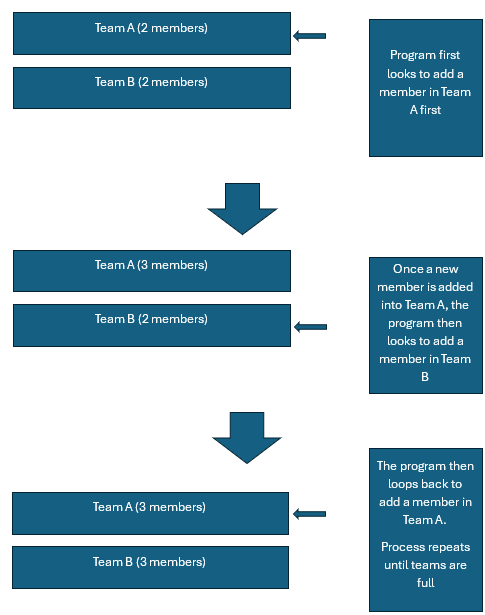
<br>
The case where there is too little students to fit the teams is accounted for as the number of teams is calculated in the function main(). This helps to ensure that the number of teams to be included is always just enough for the number of students in the tutorial group.
<br><br>
When attempting to designate a student as the new member of a team, the code does the following:
1. Tabulate the overall status of the team(being the average CGPA of the team, the Schools each student is from and the total numbers of males and females) in interest through the function gatherinfo(). The overall status is stored in a dictionary called teaminfo
2. Sorts the students who are not in a team into various priority levels through the function findmembers() based on the overall status of the team as stored in teaminfo. The students are sorted into a total of 8 priority levels, which are stored in the nested list called potentialmembers.
3. Looks through each of the priority level, starting from the highest priority level to the lowest priority level. Randomly selects a student from the highest priority level that has students in it and designate it as the new member of the team of interest.
<br>
The random selection is done due to the fact that the students of the same priority level are treated to be equal in the sense that they all make the team more diverse to the same degree. As such, it does not matter which student of the priority level is added into the team.
4. Removes the student's entry from the dictionary leftovers through the removestudent() function.
5. Move on to add a new member in the next team.
<br><br>

Once all the teams are filled, or there are no students in the dictionary leftovers, the function then returns a nested list containing the name of all the members in a team.
<br><br>
Flowchart: <br>
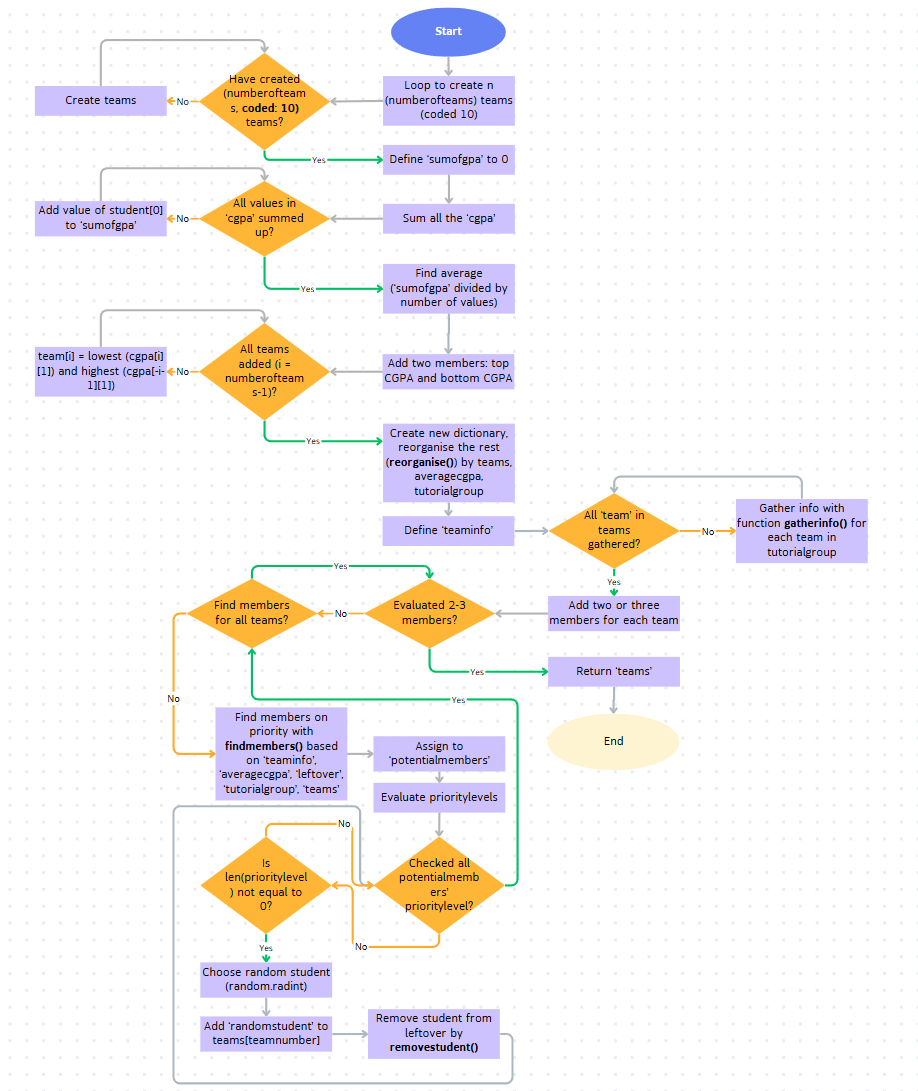


In [ ]:
# create the teams in a tutorial group
def createteams(numberofteams, cgpa, tutorialgroup):
    # creates the desired number of teams. Each element of teams is meant to be the list of names of the members in a team. 0 is just a placeholder value for the lists.
    teams = [0 * n for n in range(numberofteams)]

    # calculates the average CGPA of the tutorial group
    sumofcgpa = 0
    for student in cgpa:
        sumofcgpa += student[0]
    averagecgpa = sumofcgpa / len(cgpa)

    # Adds in the first two members of the group into the team by pairing the top x with bottom x students (x being the number of teams)
    for i in range(numberofteams):
        teams[i] = [cgpa[i][1], cgpa[-i-1][1]] # Adds a student with the highest gpa and lowest gpa into each team.
        #1st element is CGPA then student name

    # reorganises the remaining students into a dictionary called leftover. Students are sorted according to cgpa, school and then gender
    leftover = reorganise(teams, averagecgpa, tutorialgroup) # makes a new dictionary which contains the names of the students reorganised according to cgpa, school and gender

    # adds the next 2 or 3 members for each of the team. This is done one member by one member for each team to ensure better diversity.
    for members in range(0,3):
        for teamnumber in range(0, len(teams)):
            # gathers the key information of the teams at any point of time
            teaminfo = gatherinfo(teams[teamnumber], tutorialgroup)
            # organises members into different priority levels depending on how well they suit the team. This will be done for the addition of each member to the team to make sure there is
            # better diversity
            potentialmembers = findmembers(teaminfo, averagecgpa, leftover, tutorialgroup, teams[teamnumber])

            # skims through each of the priority levels. If a priority level does not have any members (ie: There is no "Most suitable" student), looks for the next best one
            for prioritylevel in potentialmembers:
                if len(prioritylevel) != 0:
                    randomstudent  = random.randint(0, len(prioritylevel)-1)
                    teams[teamnumber].append(prioritylevel[randomstudent])
                    # removes the new member from the leftover dictionary. This is because the program continuously recalculates who is good for the team with each new member added in.
                    removestudent(prioritylevel[randomstudent], leftover, tutorialgroup, averagecgpa)
                    break
                else:
                    continue
    return teams

####4. gatherinfo ####
This code collates the key information of a particular team in interest and returns a dictionary containing this information. The key information are:
1. Average CGPA of the group
2. Number of males and females in the group
3. The tally of the number of students attending each school.
<br>

Such information is crucial as we are looking to ensure that each team is as diverse as possible. The dictionary that is return will hence serve as a point of reference for the code to determine the students that will help to make the team more diverse.
<br><br>
Flowchart: <br>
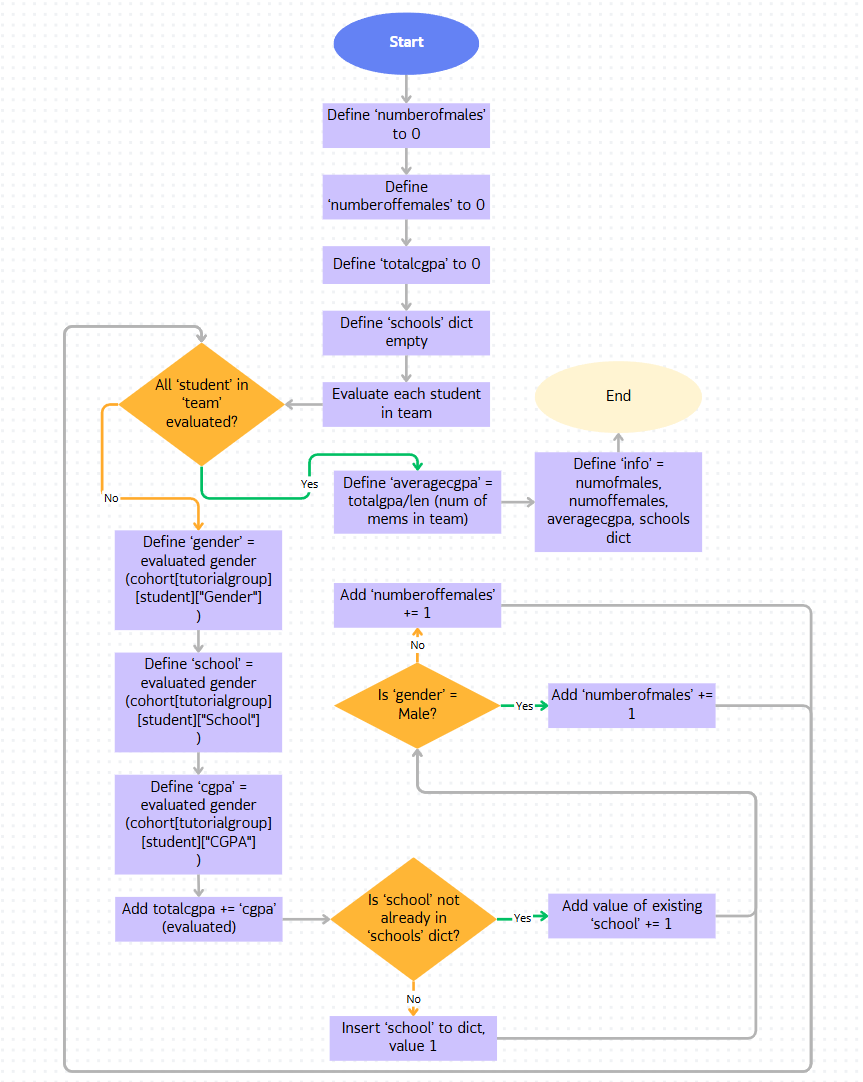


In [ ]:
# this consolidates the current information of the team
def gatherinfo(team, tutorialgroup):
    numberofmales = 0
    numberoffemales = 0
    totalcgpa = 0
    schools = {}

    # looks at each student
    for student in team:
        # gathers their information from the global dictionary cohort
        gender = cohort[tutorialgroup][student]["Gender"]
        school = cohort[tutorialgroup][student]["School"]
        cgpa = cohort[tutorialgroup][student]["CGPA"]

        # calculates the total cgpa of the group for calculation of average cgpa
        totalcgpa = totalcgpa + cgpa

        # keeps track of the schools that members are from and how many students are from that school. If the school does not exist in the dictionary,
        # insert a new entry for that school
        if school not in schools:
            schools.update({school: 1})
        else:
            schools[school] += 1

        # keeps track of the number of males and females in the group. The person is either male or female
        if gender == "Male":
            numberofmales += 1
        else:
            numberoffemales += 1

    # calculates the average cgpa
    averagecgpa = float(totalcgpa / len(team))

    # presents the information in the form of a dictionary
    info = { "males" : numberofmales,
             "females" : numberoffemales,
             "averagecgpa" : averagecgpa,
             "schools" : schools
            }

    return info

### 5. reorganise ###
After the first two members of each team is designated, the code then executes the reorganise function which collates all the students in the tutorial group who is not in a team into the dictionary called leftover. The dictionary leftover also sorts the students in a different structure compared to the global dictionary cohort. The structure of the nested dictionary leftover is as shown: <br>
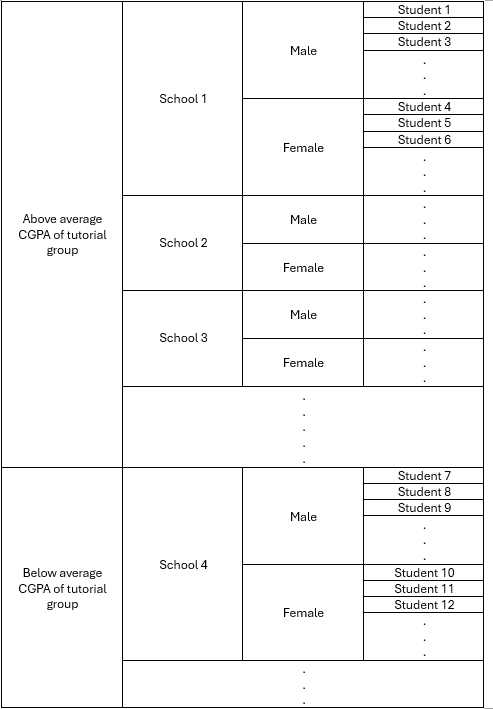
<br>
The structure is based on our definition of what it means to be diverse: <br>
- Average CGPA of the team is as close to the tutorial group's average CGPA as possible
- There is no more than half of the members from the same school
- There is no more than 3 members in the team from the same gender
<br>

The order of the dictionary (being CGPA, School and then Gender) shows how we prioritise the three critieria as outlined by the task. <br>

In [ ]:
def reorganise(teams, averagecgpa, tutorialgroup):
    listofschools = {} # list of schools holds the schools that all students in the tutorial group are from. This will be dynamically updated as the program goes through the cohort dictionary
    leftover = { "aboveavg": listofschools,
                 "belowavg": listofschools}

    # looks at every student in the tutorial group
    for student in cohort[tutorialgroup]:
        inteam = False
        # checks if the student is already in a team
        for team in teams:
            if student in team:
                inteam = True

        # if the student is already in a team, then skip the student
        if inteam:
            continue

        else:
            # notes the basic information of the students. This is done to make the code more readable
            school_of_student = cohort[tutorialgroup][student]["School"]
            gender_of_student = cohort[tutorialgroup][student]["Gender"]
            cgpa_of_student = cohort[tutorialgroup][student]["CGPA"]

            # this portion helps to dynamically include the schools of the students into the dictionary leftover.
            # if the school is not within the leftover dictionary, create a new key with the name of the new school, and the value being another dictonary which contains students sorted
            # according to their gender.
            if school_of_student not in leftover["aboveavg"]:
                # malestudents and femalestudents are dictionary containing the list of all the male and female students within a school
                malestudents = {}
                femalestudents = {}

                # school is a dictionary which contains all the students who belongs to the school
                school = {"Male": malestudents,
                          "Female": femalestudents}

                # adds the school to both the aboveavg and belowavg portion of the dictionary
                leftover["aboveavg"].update({school_of_student: school})
                leftover["belowavg"].update({school_of_student: school})

            # adds the students into the dictionary accordingly.
            if cgpa_of_student >= averagecgpa:
                if gender_of_student == "Male":
                    leftover["aboveavg"][school_of_student]["Male"].update({student:student})
                else:
                    leftover["aboveavg"][school_of_student]["Female"].update({student:student})
            else:
                if gender_of_student == "Male":
                    leftover["belowavg"][school_of_student]["Male"].update({student:student})
                else:
                    leftover["belowavg"][school_of_student]["Female"].update({student:student})
    return leftover

### 6. findmembers ###
The findmembers function sorts the students in leftover and returns a nested list potentialmembers containing the names of the students sorted in various priority levels. This is done based on the following information:
<br>
- The namelist of the members of the team in interest (team)
- The current status of the team, in terms of CGPA, number of male and female students, and a tally of the schools each students are from (teaminfo)
- The tutorial group of the students in interest (tutorialgroup) and the average CGPA of the tutorial group (tutavg)
- The names and information of students who are currently not in a team (namelist)

The code first makes a nested list of containing 8 different lists. These list is to contain the names of the students belonging to a certain priority level. As outlined in the earlier portions of the report, our definition of readable is: <br>
- Average CGPA of the team is as close to the tutorial group's average CGPA as possible
- There is no more than half of the members from the same school
- There is no more than 3 members in the team from the same gender
<br>

As such, for each student in the dictionary namelist, the function will assign a priority level to the student after considering the following:
- Does the student help to bring the average CGPA of the group closer to the tutorial group's average CGPA?
- Is the student already from school that a member of the team already in?
- Is the student of a predominant gender of the team?
<br>

While answering the second and third question is trivially easy as the information is already compiled in the dictionary teaminfo, figuring out the first question is much harder due to the fact that CGPA is a continuous data unlike Schools and Gender. This could be made simpler by considering a student's CGPA relative to the tutorial group's average CGPA. As a rule of thumb, the following is true:
- If the team's average CGPA < tutorial group's CGPA < student A's CGPA, adding student A into the team will bring the team's average CGPA closer to the tutorial group's average CGPA.
- The opposite is true as well, where the team's average CGPA > tutorial group's CGPA > student B's CGPA.
<br>

As such, the function will first check whether the average CGPA of the team is higher or lower than the average CGPA of the tutorial group. Students which are on to opposite side of the spectrum compared to the team will be prioritised higher. (ie: If the team's CGPA is higher compared to the tutorial average, the script will prioritise students with a CGPA lower compared to the tutorial average.) This helps to make it easier to prioritise students based on CGPA.
<br> <br>
The nested list potentialmembers contains a total of 8 elements, each element being a list of students in a certain priority level. The position of the element in potentialmembers represents the priority of the students in the list itself. (ie: The first element in potentialmembers represents the highest priority level and the last element in potentialmembers represents the lowest priority level) The below shows what each priority level represents.

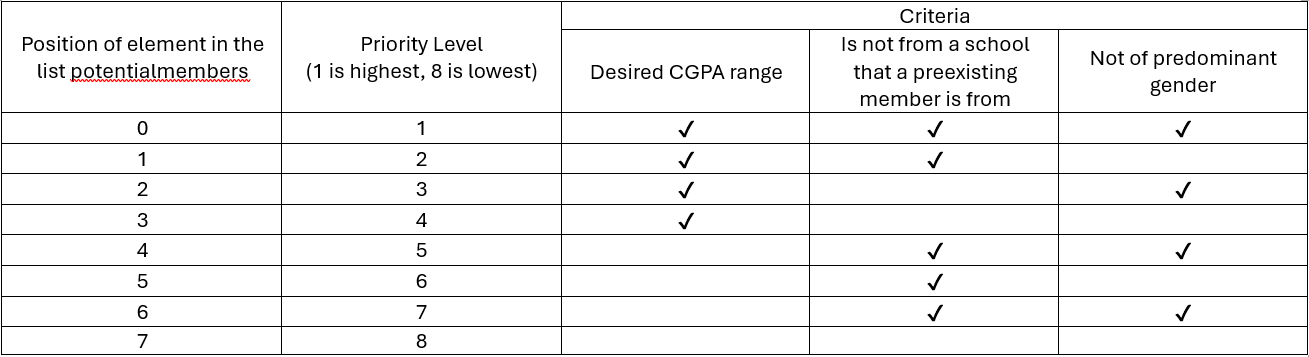
<br> <br>
Flowchart: <br>
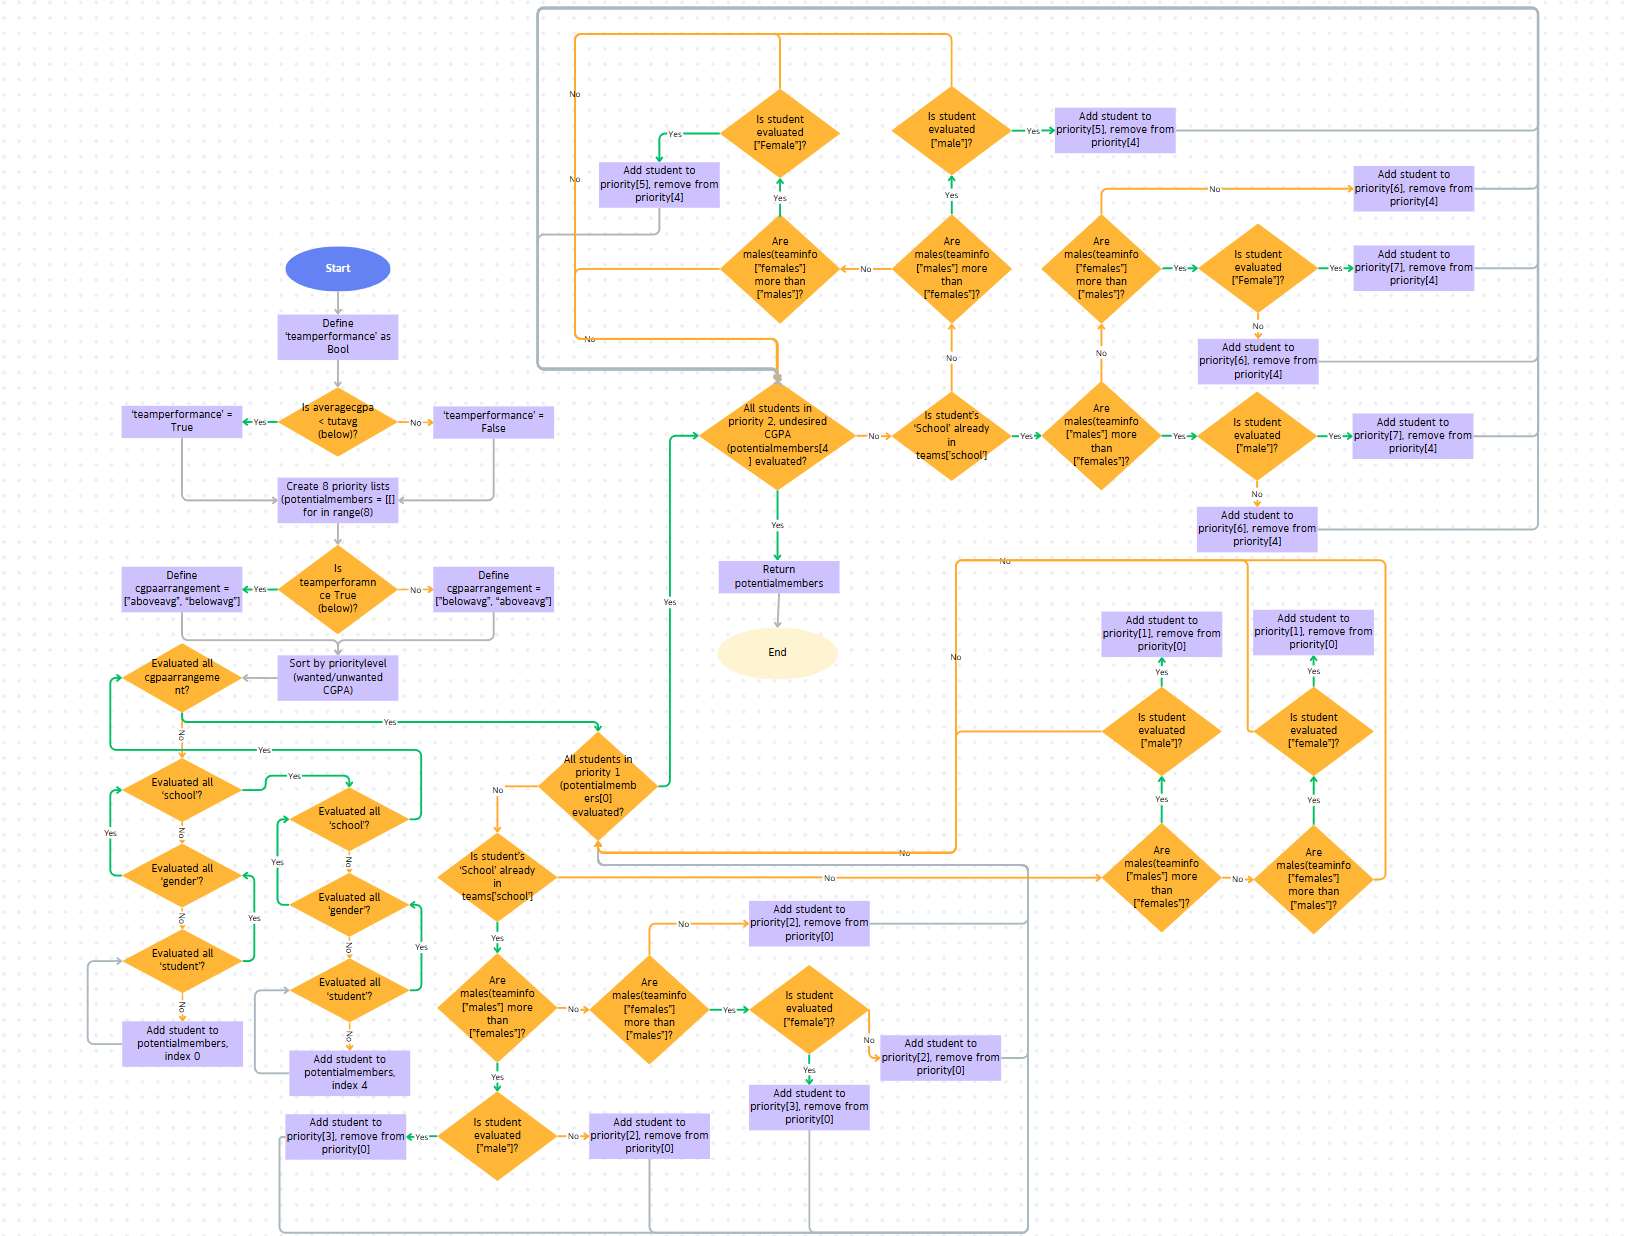

In [ ]:
# returns the list of remaining students sorted according to priority level
def findmembers(teaminfo, tutavg, namelist, tutorialgroup, team):
    teamperformance = teaminfo["averagecgpa"] < tutavg

    # presents all the members in the form of a nested list, with each element being a list containing the names of students of that priority level
    potentialmembers = [[] for i in range(8)]

    #gathers all the students that are either above avg or below avg cgpa of the tutorial group and places them all on the highest priority level they can attain based on that
    # we can see it as if the students are of the undesired cgpa range, their priority level drops by 4
    if teamperformance:
        cgpaarrangement = ["aboveavg", "belowavg"]
    else:
        cgpaarrangement = ["belowavg", "aboveavg"]

    for scorerange in cgpaarrangement:
        for school in namelist[scorerange].keys():
            for gender in namelist["aboveavg"][school]:
                for student in namelist["aboveavg"][school][gender]:
                    potentialmembers[0].append(student)

        for school in namelist[scorerange].keys():
            for gender in namelist["aboveavg"][school]:
                for student in namelist["aboveavg"][school][gender]:
                    potentialmembers[4].append(student)

    # begins to sort the student accordingly from their highest level. If a student fails to meet a certain criteria they will drop down in priority level.
    # if the student is not from the desired school, his/her priority level drops by 2 levels
    # if the student is not of the desired gender, his/her priority level drops by 1 level

    # looks through each student in the desired cgpa range
    for student in potentialmembers[0]:

        # if the student's school is the same as the members, drop their priority level by 2 to third priority. This may be further dropped by 1 if the student is not of the desired gender
        if cohort[tutorialgroup][student]["School"] in teaminfo["schools"]:
            # determines the student's priority level after considering the gender of the student.

            # for the case where group is predominantly male
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    # if the student is from the same school as a student in the team, and is of the undesired gender, the total priority level drops by 3 (2+1).
                    potentialmembers[3].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
                else:
                    # if the student is from the same school as a student in the team and is of the desired gender, the total priority level drops by 2
                    potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

            # for the case where group is predominantly female
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[3].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
                else:
                    potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

            # gender does not matter of there is an equal number of males and females, we can ignore gender considerations under such case
            else:
                potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
            continue

        # this is the case where the student is from a different school compared to any members of the team
        else:
            # This portion is the same as the portion above.
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[1].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

                # else statement is not necessary since the first priority is for students in different school AND desired gender.

            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[1].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

                # else statement is not necessary since the first priority is for students in different school AND desired gender.

            # gender does not matter if there are equal number of males and females. Since they are already of the desired school too their priority level will not drop under such case
            continue

    # does the exact same thing as the portion above, but for students of the undesired cgpa of the range
    for student in potentialmembers[4]:  # remove any students from the same school from potential member list and put them in the secondary priority list. This will only be used if there are no other students in the other
                                    # schools
        if cohort[tutorialgroup][student]["School"] in teaminfo["schools"]:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[7].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
                else:
                    potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[7].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
                else:
                    potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            else:
                potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
        else:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[5].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[5].append(potentialmembers[4].pop(potentialmembers[4].index(student)))

    return potentialmembers

### 7. removestudent ###
This function helps to removes a student who is just designated as a team member from the dictionary leftover. This prevents the possibility of a student being designated as the team member of 2 teams at any point of time. <br>
The function retrives the name, school, CGPA and gender of the student through the global dictionary cohort and then accesses the dictionary leftover to remove the name of the student.
<br><br>
Flowchart: <br>
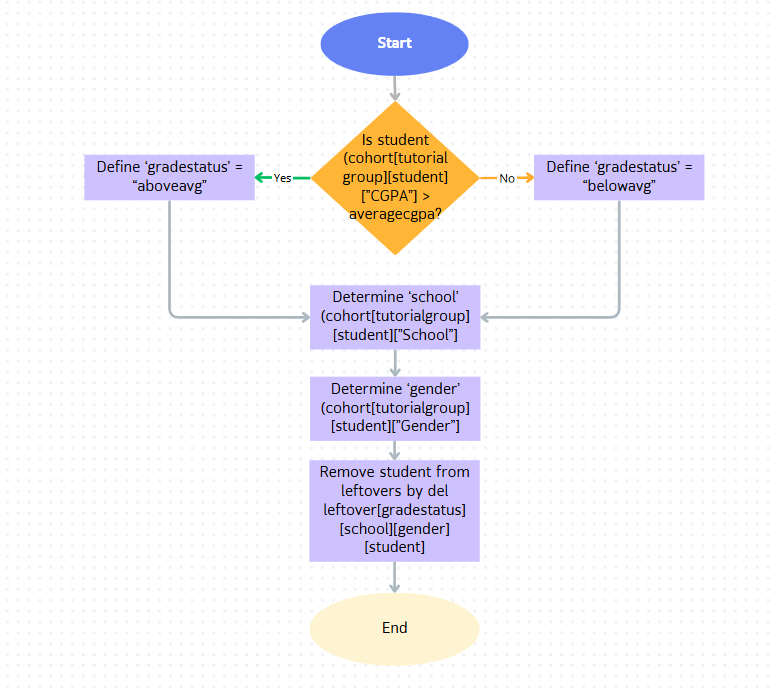

In [ ]:
# removes the newly added student from leftover dictionary which contains the students not added into a team
def removestudent(student, leftover, tutorialgroup, averagecgpa):
    # gathers information about the student to locate the student in the dictionary

    # determines which CGPA range the student lies in
    if cohort[tutorialgroup][student]["CGPA"] > averagecgpa:
        gradestatus = "aboveavg"
    else:
        gradestatus = "belowavg"
    # determines the school and gender of the student
    school = cohort[tutorialgroup][student]["School"]
    gender = cohort[tutorialgroup][student]["Gender"]

     # del removes the item from the dictionary based on the key
    del leftover[gradestatus][school][gender][student]
    return

### 8. main ###
This function ties all the other functions together and is also responsible for creating (or overwriting, if the document already exists) the output document called, which we will call teams.csv in this cell and in the flowchart for ease of referral) containing the following information: <br>
- Tutorial Group of Student
- Student ID
- School
- Name
- CGPA
- Gender
- Team that the student is allocated to (1 to 10)
<br>

The script carries out the same steps as highlighted in the overview of the code, calling each function as and when required. To make things easier during development and testing, the code creates the teams tutorial group by tutorial group, and updates the file each time the teams of a tutorial group is created. This makes it easier as we can see the task as allocating the teams of 1 tutorial group and then looping it for the rest of the tutorial groups.
<br>

A quick look at the code below also shows that the number of teams is hardcoded into the program. This is due to the fact that each of the 120 tutorial groups in records.csv contains 50 student. This, together with the fact that we aim to have 4 to 5 students per team indicates that each tutorial group will have 10 teams. The later portions of this report will show the adjustments made to the algorithm so that it create teams consisting of a custom number of students.
<br><br>
Flowchart: <br>
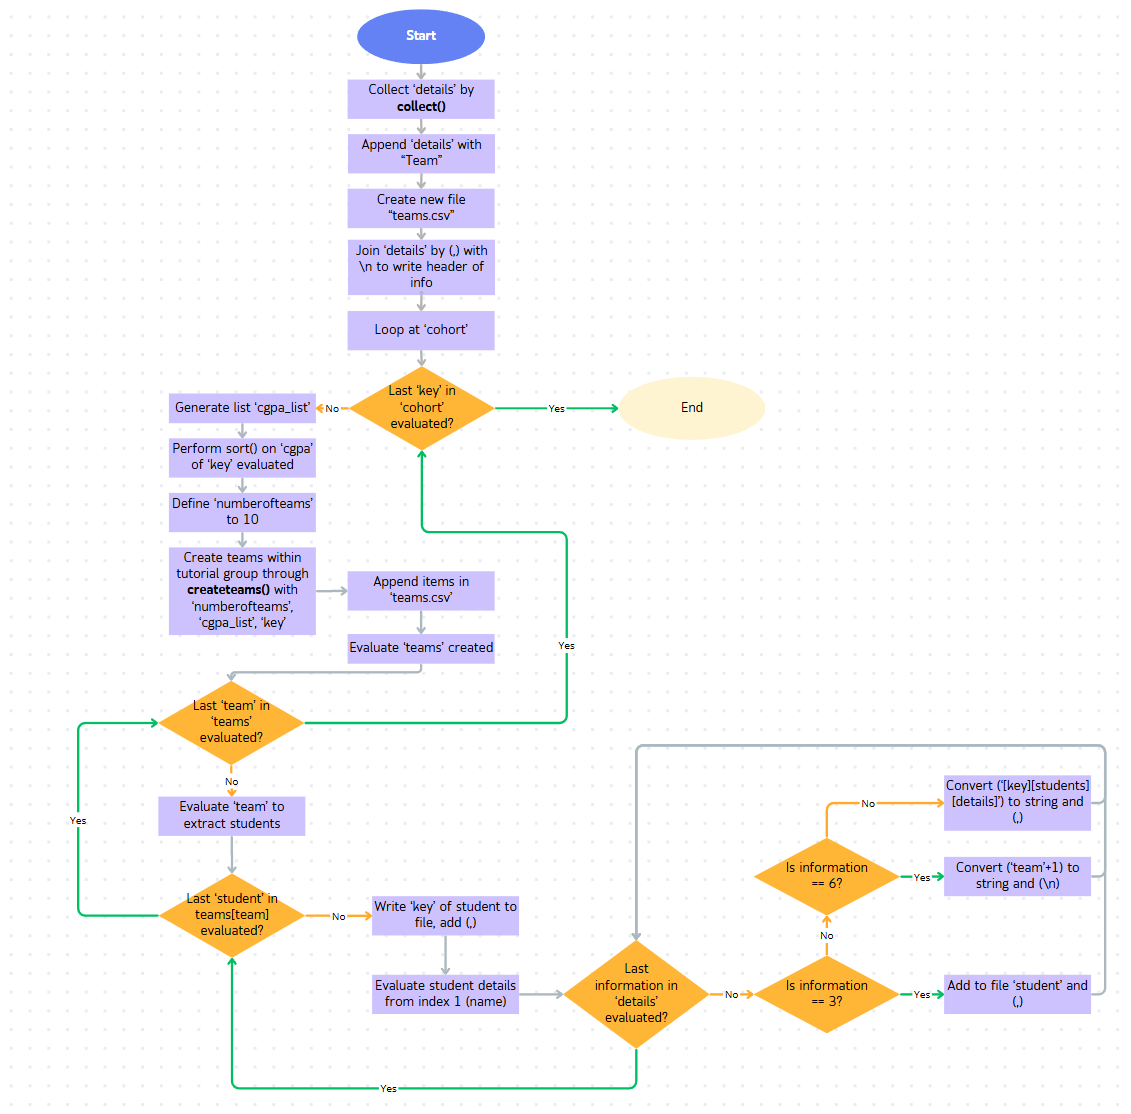

In [ ]:
def main():

    # details consist of the basic information that is to be printed on the document
    # collect adds all the students into the global dictionary called cohort
    details = collect()
    details.append("Team Assigned")

    # creates a new spreadsheet containing the updated information of the group and writes the header into the file
    with open("teams.csv", "w") as file:
            file.write(",".join(details) + "\n")

    # creates the teams tutorial group by tutorial group, and then append it into the file teams.csv
    for key in cohort:

        # produces a list of names sorted according to cgpa
        cgpa_list = cgpasort(key)

        # designates the number of teams. In this case, there are 50 students in each tutorial group. This will produce a total of 10 teams if each team
        # has 4 to 5 students.
        numberofteams = 10

        # creates the teams within the tutorial group
        teams = createteams(numberofteams, cgpa_list, key)

        # appends all of the information of the teams into the file, including the team allocation
        with open("<LabGroup>_<TeamNumber>_<LeaderName>.csv", "a") as file:
            for team in range(len(teams)):
                for student in teams[team]:
                    file.write(key + ",")
                    for information in range(1, len(details)):
                        if information == 3:
                            file.write(student + ",")
                        elif information == 6:
                            file.write(str(team + 1) + "\n")
                        else:
                            file.write(str(cohort[key][student][details[information]]) + ",")

main()

## **Full code for basic requirements** ##
Note that the output file of this code is called "FCED_1_LeaderName_basic.csv". The slight addition to the naming convention (being the basic at the end of the file name) is to ensure that the output file of the basic algorithm and the advanced algorithm are separate and will not overwrite each other due to a clash in the name.

In [ ]:
import random
cohort = {}

# collect students information from the csv file and stores it in the cohort dictionary
def collect():
    global cohort
    with open("records.csv", "r") as namelist:
        # handling the header of the table, as this is information that we need to use as the key of the dictionary personaldetails
        # note that the resultant list will be [Tutorial Group, Student ID, School, Name, Gender, CGPA]
        details = namelist.readline().split(",")
        details[-1] = details[-1].strip("\n") # this removes the newline component in the last element of the line
        # storing the information into the cohort dictionary
        for person in namelist:
            student = person.split(",") # turns the line into a list of information
            student[-1] = float(student[-1].strip("\n")) # removes the newline behind the CGPA value and transforms it into a float for easier comparision for values
            # if the tutorial group is not included in cohort, starts a new tutgrp dictionary and adds the tutorial group as a key in the dictionary.
            # This helps to dynamically input the tutorial group, instead of manually coding all 120 tutorial groups into the dictionary.
            if student[0] not in cohort:
                tutgrp = {}
                cohort.update({student[0]:tutgrp})
            # personaldetails is the dictionary containing the key information of a student (ie: Student ID, School, Gender and CGPA)
            personaldetails = {
                                details[1] : student[1],
                                details[2] : student[2],
                                details[4] : student[4],
                                details[5] : student[5]
                            }
            tutgrp.update({student[3]:personaldetails})
    return details

  # sorts students in the tutorial group in accordance to CGPA
def cgpasort(tutorialgroup):
    studentcgpa = [[cohort[tutorialgroup][student]["CGPA"], student] for student in cohort[tutorialgroup]]
    studentcgpa.sort() #sort priortises the cgpa of the students as it is the first element of each of the elements of studentcgpa
    return studentcgpa

# create the teams in a tutorial group
def createteams(numberofteams, cgpa, tutorialgroup):
    # creates the desired number of teams. Each element of teams is meant to be the list of names of the members in a team. 0 is just a placeholder value for the lists.
    teams = [0 * n for n in range(numberofteams)]

    # calculates the average CGPA of the tutorial group
    sumofcgpa = 0
    for student in cgpa:
        sumofcgpa += student[0]
    averagecgpa = sumofcgpa / len(cgpa)

    # Adds in the first two members of the group into the team by pairing the top x with bottom x students (x being the number of teams)
    for i in range(numberofteams):
        teams[i] = [cgpa[i][1], cgpa[-i-1][1]] # Adds a student with the highest gpa and lowest gpa into each team.
        #1st element is CGPA then student name

    # reorganises the remaining students into a dictionary called leftover. Students are sorted according to cgpa, school and then gender
    leftover = reorganise(teams, averagecgpa, tutorialgroup) # makes a new dictionary which contains the names of the students reorganised according to cgpa, school and gender

    # adds the next 2 or 3 members for each of the team. This is done one member by one member for each team to ensure better diversity.
    for members in range(0,3):
        for teamnumber in range(0, len(teams)):
            # gathers the key information of the teams at any point of time
            teaminfo = gatherinfo(teams[teamnumber], tutorialgroup)
            # organises members into different priority levels depending on how well they suit the team. This will be done for the addition of each member to the team to make sure there is
            # better diversity
            potentialmembers = findmembers(teaminfo, averagecgpa, leftover, tutorialgroup, teams[teamnumber])

            # skims through each of the priority levels. If a priority level does not have any members (ie: There is no "Most suitable" student), looks for the next best one
            for prioritylevel in potentialmembers:
                if len(prioritylevel) != 0:
                    randomstudent  = random.randint(0, len(prioritylevel)-1)
                    teams[teamnumber].append(prioritylevel[randomstudent])
                    # removes the new member from the leftover dictionary. This is because the program continuously recalculates who is good for the team with each new member added in.
                    removestudent(prioritylevel[randomstudent], leftover, tutorialgroup, averagecgpa)
                    break
                else:
                    continue
    return teams

# this consolidates the current information of the team
def gatherinfo(team, tutorialgroup):
    numberofmales = 0
    numberoffemales = 0
    totalcgpa = 0
    schools = {}

    # looks at each student
    for student in team:
        # gathers their information from the global dictionary cohort
        gender = cohort[tutorialgroup][student]["Gender"]
        school = cohort[tutorialgroup][student]["School"]
        cgpa = cohort[tutorialgroup][student]["CGPA"]

        # calculates the total cgpa of the group for calculation of average cgpa
        totalcgpa = totalcgpa + cgpa

        # keeps track of the schools that members are from and how many students are from that school. If the school does not exist in the dictionary,
        # insert a new entry for that school
        if school not in schools:
            schools.update({school: 1})
        else:
            schools[school] += 1

        # keeps track of the number of males and females in the group. The person is either male or female
        if gender == "Male":
            numberofmales += 1
        else:
            numberoffemales += 1

    # calculates the average cgpa
    averagecgpa = float(totalcgpa / len(team))

    # presents the information in the form of a dictionary
    info = { "males" : numberofmales,
             "females" : numberoffemales,
             "averagecgpa" : averagecgpa,
             "schools" : schools
            }

    return info

def reorganise(teams, averagecgpa, tutorialgroup):
    listofschools = {} # list of schools holds the schools that all students in the tutorial group are from. This will be dynamically updated as the program goes through the cohort dictionary
    leftover = { "aboveavg": listofschools,
                 "belowavg": listofschools}

    # looks at every student in the tutorial group
    for student in cohort[tutorialgroup]:
        inteam = False
        # checks if the student is already in a team
        for team in teams:
            if student in team:
                inteam = True

        # if the student is already in a team, then skip the student
        if inteam:
            continue

        else:
            # notes the basic information of the students. This is done to make the code more readable
            school_of_student = cohort[tutorialgroup][student]["School"]
            gender_of_student = cohort[tutorialgroup][student]["Gender"]
            cgpa_of_student = cohort[tutorialgroup][student]["CGPA"]

            # this portion helps to dynamically include the schools of the students into the dictionary leftover.
            # if the school is not within the leftover dictionary, create a new key with the name of the new school, and the value being another dictonary which contains students sorted
            # according to their gender.
            if school_of_student not in leftover["aboveavg"]:
                # malestudents and femalestudents are dictionary containing the list of all the male and female students within a school
                malestudents = {}
                femalestudents = {}

                # school is a dictionary which contains all the students who belongs to the school
                school = {"Male": malestudents,
                          "Female": femalestudents}

                # adds the school to both the aboveavg and belowavg portion of the dictionary
                leftover["aboveavg"].update({school_of_student: school})
                leftover["belowavg"].update({school_of_student: school})

            # adds the students into the dictionary accordingly.
            if cgpa_of_student >= averagecgpa:
                if gender_of_student == "Male":
                    leftover["aboveavg"][school_of_student]["Male"].update({student:student})
                else:
                    leftover["aboveavg"][school_of_student]["Female"].update({student:student})
            else:
                if gender_of_student == "Male":
                    leftover["belowavg"][school_of_student]["Male"].update({student:student})
                else:
                    leftover["belowavg"][school_of_student]["Female"].update({student:student})
    return leftover

# returns the list of remaining students sorted according to priority level
def findmembers(teaminfo, tutavg, namelist, tutorialgroup, team):
    teamperformance = teaminfo["averagecgpa"] < tutavg

    # presents all the members in the form of a nested list, with each element being a list containing the names of students of that priority level
    potentialmembers = [[] for i in range(8)]

    #gathers all the students that are either above avg or below avg cgpa of the tutorial group and places them all on the highest priority level they can attain based on that
    # we can see it as if the students are of the undesired cgpa range, their priority level drops by 4
    if teamperformance:
        cgpaarrangement = ["aboveavg", "belowavg"]
    else:
        cgpaarrangement = ["belowavg", "aboveavg"]

    for scorerange in cgpaarrangement:
        for school in namelist[scorerange].keys():
            for gender in namelist["aboveavg"][school]:
                for student in namelist["aboveavg"][school][gender]:
                    potentialmembers[0].append(student)

        for school in namelist[scorerange].keys():
            for gender in namelist["aboveavg"][school]:
                for student in namelist["aboveavg"][school][gender]:
                    potentialmembers[4].append(student)

    # begins to sort the student accordingly from their highest level. If a student fails to meet a certain criteria they will drop down in priority level.
    # if the student is not from the desired school, his/her priority level drops by 2 levels
    # if the student is not of the desired gender, his/her priority level drops by 1 level

    # looks through each student in the desired cgpa range
    for student in potentialmembers[0]:

        # if the student's school is the same as the members, drop their priority level by 2 to third priority. This may be further dropped by 1 if the student is not of the desired gender
        if cohort[tutorialgroup][student]["School"] in teaminfo["schools"]:
            # determines the student's priority level after considering the gender of the student.

            # for the case where group is predominantly male
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    # if the student is from the same school as a student in the team, and is of the undesired gender, the total priority level drops by 3 (2+1).
                    potentialmembers[3].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
                else:
                    # if the student is from the same school as a student in the team and is of the desired gender, the total priority level drops by 2
                    potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

            # for the case where group is predominantly female
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[3].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
                else:
                    potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

            # gender does not matter of there is an equal number of males and females, we can ignore gender considerations under such case
            else:
                potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
            continue

        # this is the case where the student is from a different school compared to any members of the team
        else:
            # This portion is the same as the portion above.
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[1].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

                # else statement is not necessary since the first priority is for students in different school AND desired gender.

            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[1].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

                # else statement is not necessary since the first priority is for students in different school AND desired gender.

            # gender does not matter if there are equal number of males and females. Since they are already of the desired school too their priority level will not drop under such case
            continue

    # does the exact same thing as the portion above, but for students of the undesired cgpa of the range
    for student in potentialmembers[4]:  # remove any students from the same school from potential member list and put them in the secondary priority list.
        if cohort[tutorialgroup][student]["School"] in teaminfo["schools"]:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[7].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
                else:
                    potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[7].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
                else:
                    potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            else:
                potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
        else:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[5].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[5].append(potentialmembers[4].pop(potentialmembers[4].index(student)))

    return potentialmembers

# removes the newly added student from leftover dictionary which contains the students not added into a team
def removestudent(student, leftover, tutorialgroup, averagecgpa):
    # gathers information about the student to locate the student in the dictionary

    # determines which CGPA range the student lies in
    if cohort[tutorialgroup][student]["CGPA"] > averagecgpa:
        gradestatus = "aboveavg"
    else:
        gradestatus = "belowavg"
    # determines the school and gender of the student
    school = cohort[tutorialgroup][student]["School"]
    gender = cohort[tutorialgroup][student]["Gender"]

     # del removes the item from the dictionary based on the key
    del leftover[gradestatus][school][gender][student]
    return

def main():

    # details consist of the basic information that is to be printed on the document
    # collect adds all the students into the global dictionary called cohort
    details = collect()
    details.append("Team Assigned")

    # creates a new spreadsheet containing the updated information of the group and writes the header into the file
    with open("teams.csv", "w") as file:
            file.write(",".join(details) + "\n")

    # creates the teams tutorial group by tutorial group, and then append it into the file teams.csv
    for key in cohort:

        # produces a list of names sorted according to cgpa
        cgpa_list = cgpasort(key)

        # designates the number of teams. In this case, there are 50 students in each tutorial group. This will produce a total of 10 teams if each team
        # has 4 to 5 students.
        numberofteams = 10

        # creates the teams within the tutorial group
        teams = createteams(numberofteams, cgpa_list, key)

        # appends all of the information of the teams into the file, including the team allocation
        with open("<LabGroup>_<TeamNumber>_<LeaderName>_basic.csv", "a") as file:
            for team in range(len(teams)):
                for student in teams[team]:
                    file.write(key + ",")
                    for information in range(1, len(details)):
                        if information == 3:
                            file.write(student + ",")
                        elif information == 6:
                            file.write(str(team + 1) + "\n")
                        else:
                            file.write(str(cohort[key][student][details[information]]) + ",")

main()

#**Evaluating the code algorithm**
##1. Potential issues with gender diversity in certain tutorial groups

If a tutorial group has a large disparity between the number of male and female students (e.g., 90% males and 10% females), achieving gender-balanced teams could become extremely difficult. The code's attempt to prioritize the underrepresented gender (through priority adjustments) might not have enough students from the underrepresented gender to maintain balance.

As a result, the teams may end up with a skewed gender representation that may not reflect the intended balance. For example, if one gender is too underrepresented, certain teams may end up with more students of the overrepresented gender, resulting in gender-segregated teams that could undermine the goal of diversity.

# **Challenges when developing algorithm** #
### 1. Difficulty in balancing the three criteria ###





## **Code to tackle advanced requirements** ##
As the main task of the advanced requirements largely remains the same (we are still required to sort the students into teams), our algorithm and code for the advanced requirement stays mostly the same. The key adjustments made to the code are the following:
1. In the main function, instead of hardcoding the number of teams, the number of teams are determined using the below formula: <br>
Number of teams = \begin{cases}
50 \div y & \text{if } 50 \mod y = 0,
\\
1 + (50 \div y) & \text{if } 50 \mod y \neq 0
\end{cases}
Through the above equation, we see that for a tutorial group of 49 students if the desired number of students in each team is 5, there will still be 10 teams in the tutorial group (1 team of 4 and 9 teams of 5). This helps us to handle the cases where the desired number of students is not a factor of the total number of students. This is handled by the following chunk of code in the main function:
```
numberofteams = int(len(cgpa_list) / numberofmembers)
        if not (len(cgpa_list) % numberofmembers) == 0:
            numberofteams += 1
```
2. Similarly, the createteams function is also readjusted to account for the variable nature of the number of teams. An example of such adjustments can be seen in the following portion of the code in createteams:
```
    teams = [0 * n for n in range(number)]
```
In the above snippet of code, teams is a nested list where each of the elements contains the names of the members in each team. Do note that 0 serves as a placeholder before the first two members of the team is designated (This was doen in the basic code as well.)
<br>
Similar changes are also reflected throughout the createteams function, which will be highlighted and explained in the form of comments in the full code below. <br><br>

**Important**
<br>
Note that the output file of this code is called "FCED_1_LeaderName_advanced.csv". The slight addition to the naming convention (being the "advanced" at the end of the file name) is to ensure that the output file of the basic algorithm and the advanced algorithm are separate and will not overwrite each other due to a clash in the name.

In [ ]:
import random
cohort = {}

def collect():
    global cohort
    with open("records.csv", "r") as namelist:
        details = namelist.readline().split(",")
        details[-1] = details[-1].strip("\n")
        for person in namelist:
            student = person.split(",")
            student[-1] = float(student[-1].strip("\n"))
            if student[0] not in cohort:
                tutgrp = {}
                cohort.update({student[0]:tutgrp})

            personaldetails = {
                                details[1] : student[1],
                                details[2] : student[2],
                                details[4] : student[4],
                                details[5] : student[5]
                            }
            tutgrp.update({student[3]:personaldetails})
    return details

def cgpasort(tutorialgroup):
    studentcgpa = [[cohort[tutorialgroup][student]["CGPA"], student] for student in cohort[tutorialgroup]]
    studentcgpa.sort()
    return studentcgpa

def createteams(number, cgpa, tutorialgroup, numberofmembers):
    # The function createteams now accepts number, which is the parameter that stores the number of teams and requires an additional parameter numberofmembers which stores the number of members to be in each team.
    # This is so that the function knows how many students to add into each team after the first two members are designated.
    # The nested list teams now creates the desired number of teams through list comprehension.
    teams = [0 * n for n in range(number)]
    sumofcgpa = 0
    for student in cgpa:
        sumofcgpa = sumofcgpa + student[0]
    averagecgpa = sumofcgpa / len(cgpa)
    # The code now is also able to pair up enough students to designate as the first two members of each team, given any number of teams.
    for i in range(number):
        teams[i] = [cgpa[i][1], cgpa[-i-1][1]]
    leftover = reorganise(teams, averagecgpa, tutorialgroup)
    teaminfo = {team: gatherinfo(teams[team], tutorialgroup) for team in range(len(teams))}
    # this portion is also adjusted to add in the desired number of students into each team after the first two members are designated.
    # used to be: for members in range(0,3)
    for members in range(0,numberofmembers - 2):
        for teamnumber in range(0, len(teams)):
            potentialmembers = findmembers(teaminfo[teamnumber], averagecgpa, leftover, tutorialgroup, teams[teamnumber])
            for prioritylevel in potentialmembers:
                if len(prioritylevel) != 0:
                    randomstudent  = random.randint(0, len(prioritylevel)-1)
                    teams[teamnumber].append(prioritylevel[randomstudent])
                    removestudent(prioritylevel[randomstudent], leftover, tutorialgroup, averagecgpa)
                    break
                else:
                    continue
    return teams

def removestudent(student, leftover, tutorialgroup, averagecgpa):
    if cohort[tutorialgroup][student]["CGPA"] > averagecgpa:
        gradestatus = "aboveavg"
    else:
        gradestatus = "belowavg"
    school = cohort[tutorialgroup][student]["School"]
    gender = cohort[tutorialgroup][student]["Gender"]
    del leftover[gradestatus][school][gender][student]
    return leftover


def findmembers(teaminfo, tutavg, namelist, tutorialgroup, team):
    teamperformance = teaminfo["averagecgpa"] < tutavg

    potentialmembers = [[] for i in range(8)]

    if teamperformance:
        cgpaarrangement = ["aboveavg", "belowavg"]
    else:
        cgpaarrangement = ["belowavg", "aboveavg"]

    for scorerange in cgpaarrangement:
        for school in namelist[scorerange].keys():
            for gender in namelist["aboveavg"][school]:
                for student in namelist["aboveavg"][school][gender]:
                    potentialmembers[0].append(student)

        for school in namelist[scorerange].keys():
            for gender in namelist["aboveavg"][school]:
                for student in namelist["aboveavg"][school][gender]:
                    potentialmembers[4].append(student)

    for student in potentialmembers[0]:

        if cohort[tutorialgroup][student]["School"] in teaminfo["schools"]:

            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[3].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
                else:
                    potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[3].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
                else:
                    potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))

            else:
                potentialmembers[2].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
            continue

        else:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[1].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[1].append(potentialmembers[0].pop(potentialmembers[0].index(student)))
            continue

    for student in potentialmembers[4]:
        if cohort[tutorialgroup][student]["School"] in teaminfo["schools"]:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[7].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
                else:
                    potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[7].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
                else:
                    potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            else:
                potentialmembers[6].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
        else:
            if teaminfo["males"] > teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Male":
                    potentialmembers[5].append(potentialmembers[4].pop(potentialmembers[4].index(student)))
            elif teaminfo["males"] < teaminfo["females"]:
                if cohort[tutorialgroup][student]["Gender"] == "Female":
                    potentialmembers[5].append(potentialmembers[4].pop(potentialmembers[4].index(student)))

    return potentialmembers

def gatherinfo(team, tutorialgroup):
    numberofmales = 0
    numberoffemales = 0
    totalcgpa = 0
    schools = {}
    for student in team:
        gender = cohort[tutorialgroup][student]["Gender"]
        school = cohort[tutorialgroup][student]["School"]
        cgpa = cohort[tutorialgroup][student]["CGPA"]
        totalcgpa = totalcgpa + cgpa
        if school not in schools:
            schools.update({school: 1})
        else:
            schools[school] += 1
        if gender == "Male":
            numberofmales += 1
        else:
            numberoffemales += 1
    averagecgpa = float(totalcgpa / len(team))
    info = { "males" : numberofmales,
             "females" : numberoffemales,
             "averagecgpa" : averagecgpa,
             "schools" : schools
            }
    return info



def reorganise(teams, averagecgpa, tutorialgroup):
    listofschools = {}
    leftover = { "aboveavg": listofschools,
                 "belowavg": listofschools}

    for student in cohort[tutorialgroup]:
        inteam = 0
        for team in teams:
            if student in team:
                inteam = 1
        if inteam:
            continue
        else:
            school_of_student = cohort[tutorialgroup][student]["School"]
            gender_of_student = cohort[tutorialgroup][student]["Gender"]
            cgpa_of_student = cohort[tutorialgroup][student]["CGPA"]

            if school_of_student not in leftover["aboveavg"]:
                malestudents = {}
                femalestudents = {}
                school = {"Male": malestudents,
                          "Female": femalestudents}
                leftover["aboveavg"].update({school_of_student: school})
                leftover["belowavg"].update({school_of_student: school})

            if cgpa_of_student >= averagecgpa:
                if gender_of_student == "Male":
                    leftover["aboveavg"][school_of_student]["Male"].update({student:student})
                else:
                    leftover["aboveavg"][school_of_student]["Female"].update({student:student})
            else:
                if gender_of_student == "Male":
                    leftover["belowavg"][school_of_student]["Male"].update({student:student})
                else:
                    leftover["belowavg"][school_of_student]["Female"].update({student:student})
    return leftover


def main():
    details = collect()
    details.append("Team Assigned")
    with open("teams.csv", "w") as file:
            file.write(",".join(details) + "\n")
    inputvalid = 0

    # asks for the number of members in each team according to the task specification.
    # the input will only accept an input from 4 to 10, and will continue to prompt for an input until the value given is
    # within the accept range.
    while not inputvalid:
        numberofmembers = (input("Please input number of members in each team (Between 4 to 10):"))
        try:
            numberofmembers = int(numberofmembers)
        except ValueError:
            pass
        if numberofmembers not in range(4,11):
            print("Number is out of range! Please input again")
        else:
            inputvalid = 1

    for key in cohort:
        cgpa_list = cgpasort(key)

        # this calculates the number of teams given a desired number of students in each team.
        # adds 1 to the number of teams if the numberofmembers is not a factor of the number of students in the
        # tutorial group, to ensure that there is no students who are not allocated to a team.
        numberofteams = int(len(cgpa_list) / numberofmembers)
        if not (len(cgpa_list) % numberofmembers) == 0:
            numberofteams += 1

        teams = createteams(numberofteams, cgpa_list, key, numberofmembers)
        with open("<LabGroup>_<TeamNumber>_<LeaderName>_advanced.csv", "a") as file:
            for team in range(len(teams)):
                for student in teams[team]:
                    file.write(key + ",")
                    for information in range(1, len(details)):
                        if information == 3:
                            file.write(student + ",")
                        elif information == 6:
                            file.write(str(team + 1) + "\n")
                        else:
                            file.write(str(cohort[key][student][details[information]]) + ",")

main()